## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from category_encoders import CountEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import os
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

random_state = 4012
import os
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

random_state = 4012

## 2. Load Data

In [2]:
X_train = pd.read_csv("../Processed Data Files/X_train.csv")
y_train = pd.read_csv("../Processed Data Files/y_train.csv")

In [3]:
X_train.head(5)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,location_country,have_company_profile,have_requirements,have_benefits,have_category,high_salary,flesch_score_bin_ft,fk_grade_level_bin_ft,text_len,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,...,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,0,0,1,full time,middle level,undergraduate,US,0,1,0,0,0,7,1,168,-0.035229,0.014751,0.004019,-0.079966,0.045574,-0.201960,0.004085,0.065097,0.054062,-0.036125,-0.033234,0.038893,0.001572,-0.005181,-0.002474,0.044036,-0.045368,0.019012,-0.011400,-0.025409,-0.103270,0.036922,-0.068207,0.105039,0.087598,-0.006102,0.045163,0.050263,-0.065276,-0.002949,0.028251,0.010695,-0.029812,-0.009177,0.037344,0.061102,0.042271,0.004401,-0.082566,0.008738,0.018225,0.021968,0.022483,-0.015678,0.059635,0.016055,0.061451,0.034211,-0.019283,0.007443,0.028401,0.069868,-0.026477,0.022815,-0.022790,-0.004933,0.030107,0.153180,0.067155,-0.011511,0.029749,-0.058746,-0.098929,0.016652,0.065345,-0.014309,-0.074040,0.014727,0.034699,-0.001019,0.122327,-0.017333,0.033058,-0.040979,-0.027549,0.001546,0.072455,0.074803,-0.108399,-0.033555,0.086694,-0.028350,0.044346,0.000367,0.034325,-0.033437,0.052242,0.012210,0.021076,0.016313,0.002681,0.067431,-0.024051,-0.031473,0.062512,-0.004439,0.014792,-0.277638,-0.026220,-0.037012,-0.022138,-0.044262,0.084228,0.025631,0.038756,0.054226,0.019031,0.029019,0.040575,-0.001630,0.015116,0.098976,-0.051199,0.106892,0.047423,-0.019085,-0.029954,0.006470,0.023495,0.017434,0.110540,0.083601,0.020745,-0.103506,-0.043542,0.043493,0.015273,-0.028164,-0.000418,0.054003,-0.017856,-0.034374,-0.008550,0.089467,0.092773,0.020967,0.061930,-0.007363,0.085385,0.029357,-0.053172,0.023271,0.010117,0.007429,0.116666,0.001061,0.071411,0.004273,0.023423,-0.049606,0.067146,-0.024293,-0.022011,0.011022,-0.015907,0.418066,0.097932,0.045996,0.016638,-0.014319,0.073176,0.003558,0.024802,0.066914,0.007504,-0.033232,0.030497,0.021352,0.079143,-0.036558,0.026676,-0.022304,-0.012093,-0.064270,0.008690,-0.019523,-0.058032,-0.017899,-0.093615,-0.000996,0.025719,0.033179,-0.064979,0.001354,-0.021562,0.047576,-0.027762,0.030905,-0.007060,-0.029117,0.054092,-0.051359,0.013061,0.003223,0.001006,0.128327,-0.078142,

## 3. Model

In [4]:
# Combine them!

scaler = StandardScaler()

onehot = OneHotEncoder(
    categories = [
            ['full time', 'contract', 'part time','flexi','other','unspecified'], # employment_type
            ['entry level', 'middle level', 'senior level', 'unspecified'], # required_experience
            ['high school or vocational degree', 'undergraduate', 'graduate', 'unspecified'], # required_education
    ],
    handle_unknown = 'ignore',  # <- Ignore unknown values (i.e. don't create a column for them)
)

freq_encoder = CountEncoder()

binary_columns = ['telecommuting', 'has_company_logo','has_questions', 'have_company_profile', 'have_requirements', 'have_benefits', 'have_category', 'high_salary']
numerical_columns = ['flesch_score_bin_ft','fk_grade_level_bin_ft', 'text_len']
onehot_columns = ['employment_type', 'required_experience','required_education']
freq_columns = ['location_country']

preprocessor = ColumnTransformer([
    # (nickname, transformer to apply, columns to apply to)
    ('binary', 'passthrough', binary_columns),  # <- 'passthrough' says to keep them but don't apply anything
    ('numerical', scaler, numerical_columns),   
    ('onehot', onehot, onehot_columns),
    ('frequency',freq_encoder, freq_columns),
],  remainder='passthrough')

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    # ('resampling', SMOTEENN(random_state=random_state,enn=EditedNearestNeighbours(sampling_strategy='majority'))),
    ('train', KNeighborsClassifier()),
])

params = {
    'train__n_neighbors': [3, 5, 7],  # Adjust the number of neighbors
    'train__weights': ['uniform', 'distance'],
    'train__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}


def train(x_train,y_train,model,params):
    
    gridsearchcv = GridSearchCV(model, params, cv=5, scoring='f1_weighted', verbose=3, n_jobs=-1)
    gridsearchcv.fit(x_train, y_train.values)
    best_model = model.set_params(**gridsearchcv.best_params_).fit(x_train, y_train.values)
    
    return best_model

# train
# start = time.time()
best_model = train(X_train, y_train, model, params)
# end = time.time()

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [5]:
base_path = "../Models/" # path where the file is going to be saved in 

model_name = 'KNN'

model_path = os.path.join(base_path, f'{model_name}.joblib')

joblib.dump(best_model, model_path)

['../Models/KNN.joblib']

In [6]:
print(best_model)
print("Model parameters:", best_model.get_params())

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', 'passthrough',
                                                  ['telecommuting',
                                                   'has_company_logo',
                                                   'has_questions',
                                                   'have_company_profile',
                                                   'have_requirements',
                                                   'have_benefits',
                                                   'have_category',
                                                   'high_salary']),
                                                 ('numerical', StandardScaler(),
                                                  ['flesch_score_bin_ft',
                                                   'fk_grade_level_bin_ft',
                                             

In [8]:
X_test = pd.read_csv('../Processed Data Files/X_test.csv')
y_test = pd.read_csv('../Processed Data Files/y_test.csv')

def evaluate(x_test, y_test, name, model, preprocessor):

    print(model,"\n")
    
    y_pred = model.predict(preprocessor.transform(x_test))

    scores = {}
    scores["Accuracy"]  = accuracy_score(y_test,y_pred).round(3)
    scores["Precision"] = precision_score(y_test,y_pred,average="weighted").round(3)
    scores["Recall"]    = recall_score(y_test,y_pred,average="weighted").round(3)
    scores["F1"]        = f1_score(y_test,y_pred,average="weighted").round(3)
    scores["ROC AUC"]   = roc_auc_score(y_test,y_pred,average="weighted").round(3)
    scores = {name:scores}
    print(pd.DataFrame(scores))

    cm = confusion_matrix(y_test,y_pred)
    cm_plot = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance') 

             KNN
Accuracy   0.987
F1         0.987
Precision  0.987
ROC AUC    0.926
Recall     0.987


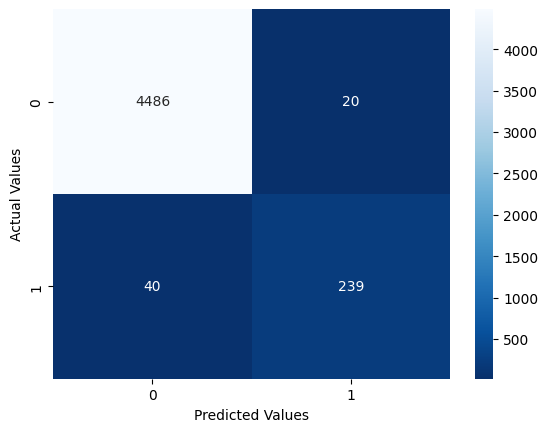

In [9]:
name = 'KNN'
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])